# Problems 10 - Information Retrieval and Recommender Systems

## 10.1 Information Retrieval - an online shop

Your online shop, sells 80 different products. You recently contracted a company to implement a "search" functionality for your shop. The company has just delivered their new retrieval system, and you are now testing it out.

You try the system, with a specific query, and the system displays the 10 products with the following IDs on the first page:

In [1]:
import numpy as np

result = np.array([ 2, 20, 36, 41, 44,  6, 71, 79, 78,  9])

You know that for the query you tried out, the relevant products are the ones with ids:

In [2]:
relevant_idx = np.array([ 2,  3,  5,  9, 14, 20, 36, 38, 39, 44, 48, 54, 58, 71, 75, 77, 78])

<font color=blue> How many relevant items did the system return? </font>

In [3]:
# YOUR CODE HERE


In [4]:
# SOLUTION

# To count the relevant items we need to count the number of relevant products that appear in the result, or alternatively, the number of result products that are relevant

# One way to do it (counting the relevant products that appear in the result) would be
ret_rel = 0
for r in relevant_idx:
    if r in result: ret_rel += 1

print(ret_rel)
        
# A more "pythonic" way to do this, would be using list comprehension. For example:
ret_rel = sum([1 for r in relevant_idx if r in result])

print(ret_rel)

# An even better way would be to calculate the boolean result and then sum how many (TRUE) values we have
bool_ret = [product in relevant_idx for product in result]
print(bool_ret)
ret_rel = sum(bool_ret)

print(ret_rel)

7
7
[True, True, True, False, True, False, True, False, True, True]
7


</br>

<font color=blue> What is the Precision, Recall and F1-score values for the above query? </font>

Remember:

$P = \frac{\lvert ret \cap rel \rvert}{ret}$

$R = \frac{\lvert ret \cap rel \rvert}{rel}$

$F = \frac{2 P R}{P + R}$

In [5]:
# YOUR CODE HERE


In [6]:
# SOLUTION

ret = len(result) # The number of returned items
rel = len(relevant_idx) # The number of relevant items in the database

P = float(ret_rel) / ret
R = float(ret_rel) / rel
F = 2*P*R/(P+R)

print("Precision: ", P)
print("Recall: ", R)
print("F1 score:", F)

Precision:  0.7
Recall:  0.4117647058823529
F1 score: 0.5185185185185185


The retrieval system only displays the ten best products on the first page, but internally it has scored all the products in the database against the query. For the same query as before, the scores for all 80 products that the system has calculated are given in the list below. The higher the number, the better it matches the query.

In [7]:
scores = np.array([76.25960904, 37.2712716 , 97.43522538, 85.2135435 , 38.42166524,
       59.33358171, 90.84382517, 34.59173848, 53.24126568, 87.80759099,
       71.13477237, 52.24501123, 53.84857359, 72.34145019, 82.60724712,
       60.13854056, 50.02218001, 67.69020948, 49.20740763, 48.19740307,
       97.26734714, 33.43817817, 46.61489   , 45.70630798, 12.03883746,
       43.71217679, 66.03930779, 76.31438734, 10.98192963, 29.80459484,
       14.7397168 , 21.48280983, 39.81730095, 28.18530124, 36.35538331,
       55.10834932, 95.5515258 , 13.10765296, 86.70784949, 81.82826684,
       55.79913761, 94.58702549, 79.3577133 , 72.84811652, 92.9954021 ,
       78.36304059, 62.00806942, 16.43752292, 83.44531762, 82.46218716,
       10.26819206, 64.56747866, 61.1888231 , 11.73771   , 36.15240615,
       63.08775437, 18.5772151 , 15.75830887, 40.75549881, 68.84171716,
       16.72596633, 57.49016213, 51.46845883, 23.56191592, 43.31518323,
       74.93840142, 25.68485212, 26.20211702, 27.50582533, 63.53842237,
       28.30218436, 89.65913426, 31.90662515, 41.68472171, 69.13468994,
       36.35852244, 19.61632789, 79.82716108, 88.39815675, 88.55666924])

</br>

<font color=blue> Can you calculate the Precision and Recall if you displayed 20 or 40 products on the first page? </font>

> Note 1: This is what we would call P@20, R@20, P@40, R@40.

> Note 2: Have a look at the Numpy function `argsort()` to solve this problem  ( https://numpy.org/doc/1.18/reference/generated/numpy.argsort.html ).

In [21]:
# Hint

# Suppose you have a list of numbers like this:
a = np.array([10,1,5])

# You can short the values from smaller to larger, by using np.sort()
print("Sorted values:", np.sort(a))

# You can short the indices, by using np.argsort()
print("Sorted values:", np.argsort(a))

Sorted values: [ 1  5 10]
Sorted values: [1 2 0]


In [22]:
# YOUR CODE HERE


In [23]:
# SOLUTION

# First, we need to order the products according to the scores we have calculated.
# But we are not interested in ordering the values, but in ordering the indices, according to their values!
# Therefore we will use the argsort() function
# Now, if we sort based on the scores, it will return to us the smaller values first. We want to sort the other way around, so instead of sorting (scores), we can sort (-scores)

# to find out which are the indexes of the max and min values. Useful to check that the indexes are correctly sorted.
print("max. value: {}".format(max(scores)))
print("max. value index: {}".format(np.where(scores == max(scores))))
print("min. value: {}".format(min(scores)))
print("min. value index: {}".format(np.where(scores == min(scores))))

sorted_idx = np.argsort(-scores)

print("\nOur sorted indices:")
print(sorted_idx)

print("\nJust to double check, if we use these indices on the scores array, values should be correctly sorted:")
print(scores[sorted_idx])

max. value: 97.43522538
max. value index: (array([2], dtype=int64),)
min. value: 10.26819206
min. value index: (array([50], dtype=int64),)

Our sorted indices:
[ 2 20 36 41 44  6 71 79 78  9 38  3 48 14 49 39 77 42 45 27  0 65 43 13
 10 74 59 17 26 51 69 55 46 52 15  5 61 40 35 12  8 11 62 16 18 19 22 23
 25 64 73 58 32  4  1 75 34 54  7 21 72 29 70 33 68 67 66 63 31 76 56 60
 47 57 30 37 24 53 28 50]

Just to double check, if we use these indices on the scores array, values should be correctly sorted:
[97.43522538 97.26734714 95.5515258  94.58702549 92.9954021  90.84382517
 89.65913426 88.55666924 88.39815675 87.80759099 86.70784949 85.2135435
 83.44531762 82.60724712 82.46218716 81.82826684 79.82716108 79.3577133
 78.36304059 76.31438734 76.25960904 74.93840142 72.84811652 72.34145019
 71.13477237 69.13468994 68.84171716 67.69020948 66.03930779 64.56747866
 63.53842237 63.08775437 62.00806942 61.1888231  60.13854056 59.33358171
 57.49016213 55.79913761 55.10834932 53.84857359 53.2412

In [24]:
# SOLUTION (cont)

# Now it easy to calculate precision and recall at any given cut off point. For example, P@20 and R@20 would be as follows:
result_at_20 = sorted_idx[:20]
ret_rel = np.sum([product in relevant_idx for product in result_at_20])

ret = len(result_at_20) # The number of returned items which should be == 20
rel = len(relevant_idx) # The number of relevant items in the database

P = float(ret_rel) / ret
R = float(ret_rel) / rel
F = 2*P*R/(P+R)

print("P @ 20: ", P)
print("R @ 20: ", R)
print("F1 @ 20:", F)

P @ 20:  0.65
R @ 20:  0.7647058823529411
F1 @ 20: 0.7027027027027027


In [25]:
# SOLUTION (cont)

# Same for P and R @40
ret_rel = np.sum([product in relevant_idx for product in sorted_idx[:40]])
P = float(ret_rel) / 40
R = float(ret_rel) / rel

print("P @ 40: ", P)
print("R @ 40: ", R)
print("F1 @ 40:", 2*P*R/(P+R))

P @ 40:  0.35
R @ 40:  0.8235294117647058
F1 @ 40: 0.4912280701754386


</br>

<font color=blue> In order to get an overall idea about how good the retrieval is, draw the Precision/Recall plot </font>

In [26]:
# YOUR CODE HERE


[True, True, True, False, True, False, True, False, True, True, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
@1, 	prec: 1.00, 	rec: 0.06
@2, 	prec: 1.00, 	rec: 0.12
@3, 	prec: 1.00, 	rec: 0.18
@4, 	prec: 0.75, 	rec: 0.18
@5, 	prec: 0.80, 	rec: 0.24
@6, 	prec: 0.67, 	rec: 0.24
@7, 	prec: 0.71, 	rec: 0.29
@8, 	prec: 0.62, 	rec: 0.29
@9, 	prec: 0.67, 	rec: 0.35
@10, 	prec: 0.70, 	rec: 0.41
@11, 	prec: 0.73, 	rec: 0.47
@12, 	prec: 0.75, 	rec: 0.53
@13, 	prec: 0.77, 	rec: 0.59
@14, 	prec: 0.79, 	rec: 0.65
@15, 	prec: 0.73, 	rec: 0.65
@16, 	prec: 0.75, 	rec: 0.71
@

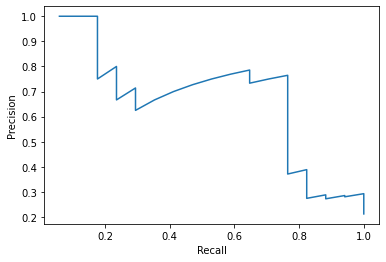

In [30]:
# SOLUTION #

P = np.zeros(len(scores))
R = np.zeros(len(scores))

rel = len(relevant_idx)
boolean_result = [product in relevant_idx for product in sorted_idx]

print(boolean_result)

for k in range(len(scores)): 
    ret = k+1 # NOTE THAT WE USE ZERO-INDEXED LISTS
    ret_rel = np.sum(boolean_result[:ret])
    P[k] = float(ret_rel) / ret
    R[k] = float(ret_rel) / rel
    print("@{}, \tprec: {:.2f}, \trec: {:.2f}".format(ret, P[k], R[k]))
    
# Precision Recall plot
import matplotlib.pyplot as plt

plt.plot(R, P)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

</br>

<font color=blue> Now calculate the Average Precision value. </font>

<i> Remember: </i>

$AP = \displaystyle\sum_{k=1}^{N} P(k) \Delta R(k)$

or

$AP = \displaystyle \frac{\sum_{k=1}^{N} P(k) rel(k)}{|rel|}$

where $rel(k)$ is in $\{0,1\}$ indicates if item $k$ is relevant or not

In [141]:
# YOUR CODE HERE


In [31]:
# SOLUTION

AP = 0

for k in range(len(scores)):
    if boolean_result[k]:
        AP = AP + P[k]/rel

print("Average Precision: {0}".format(AP))

Average Precision: 0.6872967180508048


## 10.2 Recommender Systems

You are working on a movie recommendation system, and you have been given the following ratings table.

Each row corresponds to a user, and each column to a movie. Ratings are between 1 and 5 stars, while a rating equal to `None` (NaN) means that the user has not rated that particular movie.

In [32]:
import pandas as pd

In [33]:
ratings = pd.read_csv("ratings.csv", index_col = 0)
ratings

,Movie 0,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5,Movie 6,Movie 7,Movie 8,Movie 9,Movie 10,Movie 11,Movie 12,Movie 13,Movie 14
User 0,4.0,1.0,5,2.0,4.0,5,NaN,1.0,3.0,1.0,5.0,1.0,5.0,NaN,NaN
User 1,5.0,1.0,3,5.0,1.0,2,4.0,3.0,NaN,NaN,5.0,1.0,4.0,1.0,NaN
User 2,1.0,NaN,1,NaN,5.0,1,5.0,4.0,2.0,1.0,1.0,NaN,4.0,1.0,2.0
User 3,NaN,1.0,3,1.0,NaN,1,3.0,4.0,4.0,NaN,5.0,3.0,2.0,NaN,4.0
User 4,3.0,3.0,4,2.0,NaN,2,4.0,1.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN
User 5,4.0,NaN,1,2.0,2.0,4,2.0,1.0,2.0,1.0,5.0,3.0,5.0,3.0,4.0
User 6,2.0,4.0,3,2.0,1.0,2,NaN,NaN,3.0,NaN,5.0,5.0,NaN,NaN,NaN
User 7,5.0,5.0,5,4.0,4.0,4,2.0,1.0,NaN,1.0,4.0,3.0,5.0,3.0,3.0
User 8,5.0,1.0,3,NaN,1.0,4,5.0,4.0,NaN,4.0,5.0,NaN,1.0,NaN,NaN
User 9,2.0,3.0,1,5.0,3.0,1,4.0,1.0,1.0,2.0,5.0,NaN,4.0,NaN,5.0


In addition, you are given the following ratings that another user has made for the same movies.

In [34]:
target = pd.read_csv("target.csv", header = 0, index_col=0, squeeze = True)
target

Movie 0     1.0
Movie 1     NaN
Movie 2     NaN
Movie 3     2.0
Movie 4     4.0
Movie 5     NaN
Movie 6     1.0
Movie 7     4.0
Movie 8     NaN
Movie 9     NaN
Movie 10    NaN
Movie 11    NaN
Movie 12    NaN
Movie 13    3.0
Movie 14    5.0
Name: 0, dtype: float64

You are asked to predict the ratings for the movies that the target user has not seen yet, that is for the movies that have a rating of zero in the target user array.

First, we will calculate the similarity between the target user and each of the users in our ratings table. We will then use the 3 most similar users to derive recommendations.

To calculate similarity between users, we will use the Pearson correlation formula:

$sim(a, b) = \frac{\sum_{p \in P} (r_{a,p}-\hat{r_a}) (r_{b,p}-\hat{r_b}) }{\sqrt{\sum_{p \in P} (r_{a,p}-\hat{r_a})^2} \sqrt{\sum_{p \in P} (r_{b,p}-\hat{r_b})^2} }$

where a and b are users, and P is the set of the items for which BOTH users have provided ratings.

Luckily, pandas has a function for calculating correlation: `DataFrame.corrwith()`. This will calculate the correlation between the target series and every row of the ratings dataframe if we specify that `axis = 1` (row-wise).

> See the docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html?highlight=corrwith#pandas.DataFrame.corrwith

In [36]:
similarity = ratings.corrwith(target, axis = 1, method = 'pearson') # This function calculates everything based on common items (e.g. mean of user is calculated based only on the common items with that other user we correlate with)
similarity

User 0   -0.333333
User 1   -0.751237
User 2    0.062994
User 3    0.645497
User 4   -0.912871
User 5   -0.040032
User 6   -0.944911
User 7   -0.303697
User 8   -0.762493
User 9    0.023702
dtype: float64

In order to predict accurate preferences, we should only take into account users that have a minimum number of items in common to our target user. This minimum is up to us to define (depends on your data and your application).

First, we need to count how many items each user has in common with our target user.

We can calculate this using boolean logic. First we check for which items we have ratings (True) and for which no (False). Then we check for which items we have True in both the ratings data frame AND the target series. Then it is a matter of summing up how many True values we have in every row. This is summarised below, although it would be easier to understand if you do the calculations step by step and print out the result.

In [43]:
# Find how many items do they have in common
commonItems = (~ratings.isna()) & (~target.isna())
print(commonItems)
nCommon = commonItems.sum(axis = 1)
nCommon

        Movie 0  Movie 1  Movie 2  Movie 3  Movie 4  Movie 5  Movie 6  \
User 0     True    False    False     True     True    False    False   
User 1     True    False    False     True     True    False     True   
User 2     True    False    False    False     True    False     True   
User 3    False    False    False     True    False    False     True   
User 4     True    False    False     True    False    False     True   
User 5     True    False    False     True     True    False     True   
User 6     True    False    False     True     True    False    False   
User 7     True    False    False     True     True    False     True   
User 8     True    False    False    False     True    False     True   
User 9     True    False    False     True     True    False     True   

        Movie 7  Movie 8  Movie 9  Movie 10  Movie 11  Movie 12  Movie 13  \
User 0     True    False    False     False     False     False     False   
User 1     True    False    False     Fals

User 0    4
User 1    6
User 2    6
User 3    4
User 4    4
User 5    7
User 6    3
User 7    7
User 8    4
User 9    6
dtype: int64

We can now get the indices of the users that have more than 3 items with the target. This should drop User 6 in this case who only has exactly 3 items in common with the target.

In [45]:
minItemsCommon = 3

# Get the indices of users with whom we have more than minItemsCommon items in common with the query one
idx = nCommon.index[nCommon > minItemsCommon]
print (idx)

#keep only the users that have more than minItemsCommon with the query
similarity = similarity.loc[idx]
similarity

Index(['User 0', 'User 1', 'User 2', 'User 3', 'User 4', 'User 5', 'User 7',
       'User 8', 'User 9'],
      dtype='object')


User 0   -0.333333
User 1   -0.751237
User 2    0.062994
User 3    0.645497
User 4   -0.912871
User 5   -0.040032
User 7   -0.303697
User 8   -0.762493
User 9    0.023702
dtype: float64

Now, let's find the 3 most similar users in the remaining ones. We can do that by sorting the similarities series (from larger to smaller) and keeping the first three entries. We can do this using the `sort_values()` function of pandas.

> See the documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [50]:
topN = 3

similarity.sort_values(ascending = False, inplace = True)
idx = similarity.index[:topN] # get the indices of the top N most similar users
idx

Index(['User 3', 'User 2', 'User 9'], dtype='object')

Now that we have the most similar users, we can use their ratings to derive ratings for the target user. To combine the ratings of the most similar users we will use the formula:

$ pred(a, i) = \hat{r_a} + \frac{\sum_{b \in N} sim(a, b) (r_{b,i} - \hat{r_b})}{\sum_{b \in N} sim(a,b)} $

where a and i are the user and item for which we want to predict a rating, and N is the set of similar users we have identified.

For example, if we wanted to derive the rating for the Movie 2 (`target["Movie 2"]`), we would combine ratings in the following way:

In [57]:
m = "Movie 2" #The movie we are interested in predicting a rating for

# initialise two variables in which we will hold the sums of the numerator and the demoninator of our formula
sum_nom = sum_denom = 0 

# Loop through the list of similar users
for u in idx:
    user_ratings = ratings.loc[u] # the row of ratings corresponding to user u
    print("\nuser:", u, "Similarity: ", similarity[u])
    #print(user_ratings)
    
    # Only use the users that have rated the movie we are interested in
    if ~(user_ratings.isna()[m]): 
        print("Has seen the movie:", m)        
        print("Gave it a rating of: ", user_ratings[m])        
        mu = user_ratings.mean() # Calculate the mean rating of the user, this is based only on movies that have a rating != NaN
        print("Mean: ", mu)
        sum_nom = sum_nom + similarity[u]*(user_ratings[m] - mu) # Nominator
        sum_denom = sum_denom + similarity[u] # Denominator
    else:
        print("Has not seen the movie. Ignore.")

if sum_denom != 0: # Check if at least one of the similar users had rated the movie in question, otherwise our denominator would be equal to 0
    target[m] = target.mean() + sum_nom / sum_denom
    
print("\nThe predicted rating for", m, "is", target[m])
print("\nAll ratings of the target user: \n", target)


user: User 3 Similarity:  0.6454972243679027
Has seen the movie: Movie 2
Gave it a rating of:  3.0
Mean:  2.8181818181818183

user: User 2 Similarity:  0.06299407883487121
Has seen the movie: Movie 2
Gave it a rating of:  1.0
Mean:  2.3333333333333335

user: User 9 Similarity:  0.023702273156998892
Has seen the movie: Movie 2
Gave it a rating of:  1.0
Mean:  2.8461538461538463

The predicted rating for Movie 2 is 2.840930109126895

All ratings of the target user: 
 Movie 0     1.00000
Movie 1         NaN
Movie 2     2.84093
Movie 3     2.00000
Movie 4     4.00000
Movie 5         NaN
Movie 6     1.00000
Movie 7     4.00000
Movie 8         NaN
Movie 9         NaN
Movie 10        NaN
Movie 11        NaN
Movie 12        NaN
Movie 13    3.00000
Movie 14    5.00000
Name: 0, dtype: float64


<font color=blue> Do the same for all the movies that the target user has not rated yet. </font>

In [58]:
# YOUR CODE HERE


In [59]:
# SOLUTION #

# Loop through all the movies
for m in ratings:
    
    # We only care in deriving rankings for movies that currently do not have one
    if target.isna()[m]:
        # initialise two variables in which we will hold the sums of the nominator and the demoninator of our formula
        sum_nom = sum_denom = 0 

        # Loop through the list of similar users
        for u in idx:
            user_ratings = ratings.loc[u] # the row of ratings corresponding to user u

            # Only use the users that have rated the movie we are interested in
            if ~(user_ratings.isna()[m]): 
                mu = user_ratings.mean() # Calculate the mean rating of the user, this is based only on movies that have a rating != NaN
                sum_nom = sum_nom + similarity[u]*(user_ratings[m] - mu) # Nominator
                sum_denom = sum_denom + similarity[u] # Denominator

        if sum_denom != 0: # Check if at least one of the similar users had rated the movie in question, otherwise our denominator would be equal to 0
            target[m] = target.mean() + sum_nom / sum_denom

print("\nThe predicted ratings of the target user are\n", target)


The predicted ratings of the target user are
 Movie 0     1.000000
Movie 1     1.106781
Movie 2     2.840930
Movie 3     2.000000
Movie 4     4.000000
Movie 5     0.883483
Movie 6     1.000000
Movie 7     4.000000
Movie 8     3.436562
Movie 9     1.369655
Movie 10    4.348272
Movie 11    2.796101
Movie 12    2.086709
Movie 13    3.000000
Movie 14    5.000000
Name: 0, dtype: float64
